<a href="https://colab.research.google.com/github/AishuShans/Ai-and-ml-course/blob/main/mini_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
arr=np.array([1,2,3,4,5,6,7,8,9,10,11,12])

In [3]:
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
import pandas as pd

In [5]:
np.random.seed(42)

In [41]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [42]:
print(apartments)

['Apt_1', 'Apt_2', 'Apt_3', 'Apt_4', 'Apt_5', 'Apt_6', 'Apt_7', 'Apt_8', 'Apt_9', 'Apt_10', 'Apt_11', 'Apt_12', 'Apt_13', 'Apt_14', 'Apt_15', 'Apt_16', 'Apt_17', 'Apt_18', 'Apt_19', 'Apt_20']


In [43]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [44]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)* len(apartments))
}

In [45]:
data

{'Date': array(['2025-07-01T00:00:00.000000000', '2025-07-02T00:00:00.000000000',
        '2025-07-03T00:00:00.000000000', '2025-07-04T00:00:00.000000000',
        '2025-07-05T00:00:00.000000000', '2025-07-06T00:00:00.000000000',
        '2025-07-07T00:00:00.000000000', '2025-07-08T00:00:00.000000000',
        '2025-07-09T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
        '2025-07-11T00:00:00.000000000', '2025-07-12T00:00:00.000000000',
        '2025-07-13T00:00:00.000000000', '2025-07-14T00:00:00.000000000',
        '2025-07-15T00:00:00.000000000', '2025-07-16T00:00:00.000000000',
        '2025-07-17T00:00:00.000000000', '2025-07-18T00:00:00.000000000',
        '2025-07-19T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
        '2025-07-21T00:00:00.000000000', '2025-07-22T00:00:00.000000000',
        '2025-07-23T00:00:00.000000000', '2025-07-24T00:00:00.000000000',
        '2025-07-25T00:00:00.000000000', '2025-07-26T00:00:00.000000000',
        '2025-07-27T00:00:00.0

In [46]:
df=pd.DataFrame(data)

In [47]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,23.784943
1,2025-07-02,Apt_1,15.389173
2,2025-07-03,Apt_1,24.348030
3,2025-07-04,Apt_1,26.778189
4,2025-07-05,Apt_1,22.067175
...,...,...,...
595,2025-07-26,Apt_20,22.202374
596,2025-07-27,Apt_20,19.901811
597,2025-07-28,Apt_20,22.762450
598,2025-07-29,Apt_20,21.119571


In [48]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [49]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,23.78
1,2025-07-02,Apt_1,15.39
2,2025-07-03,Apt_1,24.35
3,2025-07-04,Apt_1,26.78
4,2025-07-05,Apt_1,22.07
...,...,...,...
595,2025-07-26,Apt_20,22.20
596,2025-07-27,Apt_20,19.90
597,2025-07-28,Apt_20,22.76
598,2025-07-29,Apt_20,21.12


In [50]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [51]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          20.451550
min    2025-07-01 00:00:00           5.520000
25%    2025-07-08 00:00:00          17.187500
50%    2025-07-15 12:00:00          20.530000
75%    2025-07-23 00:00:00          23.632500
max    2025-07-30 00:00:00          33.160000
std                    NaN           5.012139


In [52]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [53]:
usage_per_apartments=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartments)

Apartment
Apt_10    662.58
Apt_18    661.94
Apt_1     649.73
Apt_15    638.42
Apt_14    635.35
Apt_11    633.26
Apt_9     631.90
Apt_6     628.77
Apt_8     622.74
Apt_17    621.55
Apt_19    612.43
Apt_7     603.80
Apt_12    595.18
Apt_4     594.34
Apt_13    593.52
Apt_16    581.55
Apt_3     580.50
Apt_2     579.73
Apt_20    574.35
Apt_5     569.29
Name: Electricity_usage, dtype: float64


In [54]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    19.4400
2025-07-02    19.5960
2025-07-03    19.0245
2025-07-04    21.8510
2025-07-05    20.1375
Name: Electricity_usage, dtype: float64


In [19]:
pip install matplotlib

In [55]:
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns

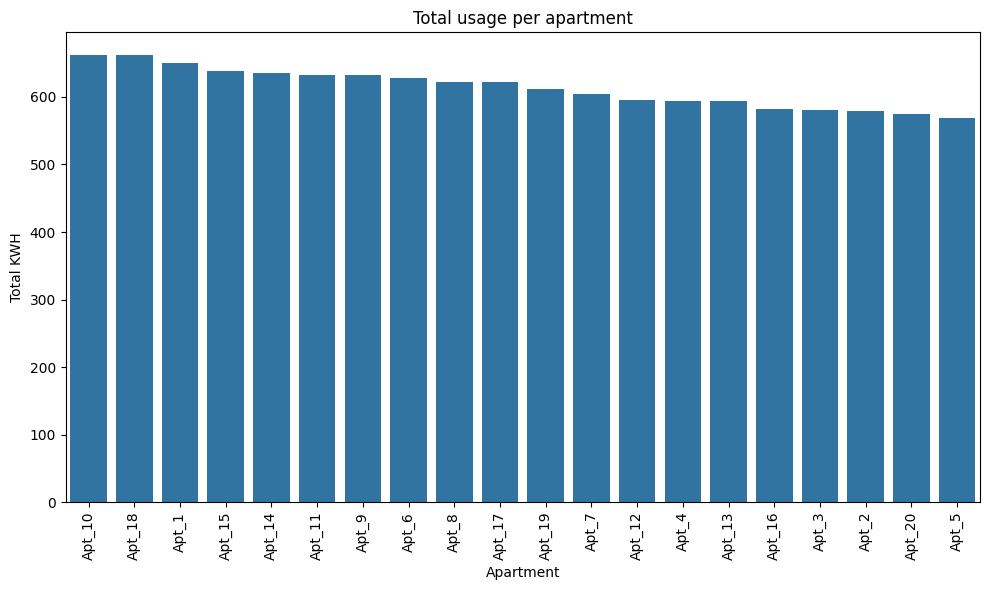

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartments.index,y=usage_per_apartments.values)
plt.xticks(rotation=90)
plt.title("Total usage per apartment")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

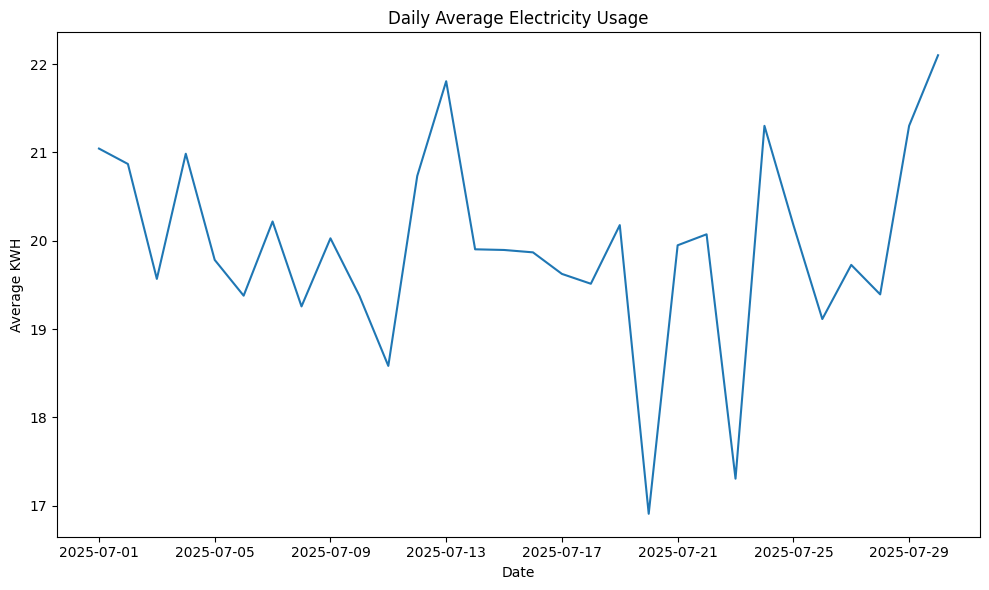

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily Average Electricity Usage")
plt.xlabel("Date")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()

In [58]:
threshold=df["Electricity_usage"].mean()+2*df["Electricity_usage"].std()
df["High_Usage_flag"]=df["Electricity_usage"] > threshold
print(df[df["High_Usage_flag"]==True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
14  2025-07-15     Apt_1              32.23             True
54  2025-07-25     Apt_2              32.87             True
155 2025-07-06     Apt_6              33.16             True
162 2025-07-13     Apt_6              32.80             True
222 2025-07-13     Apt_8              31.49             True
